In [1]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Carregando os dados

In [2]:
#Carregando dataframe

df = pd.read_csv(r'C:\Users\Leonardo\Desktop\DNC\DEX\Slot_4\MiniProjeto2\Walmart.csv', encoding='utf-8')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Exploração dos dados

In [3]:
df.info()
#Possível observar a inexistência de dados nulos nas variáveis
#Date está em formato string, passaremos para formato datetime para facilitar exploração de dados futuras

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
#Verificando se há dados dados duplicados

df.duplicated().sum()

#Nenhum dado veio duplicado

0

In [5]:
#Verificando a quantidade de dados únicos por variável

df_nunique = df.nunique()
df_nunique

#Possível observar que estamos lidando com 45 lojas, em 143 semanas diferentes

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [6]:
#Descrevendo as variáveis do dataset
df.describe()

#média de venda semanal = US$1.046.965
#mínimo de venda semanal = US$209.986
#máximo de venda semanal = US$3.818.686

#Foi possível observar que a temperatura está em Farenheit, faremos uma conversão para ºC com o intuito de facilitar o entendimento

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
#Calculando a correlação das variáveis com o preço

grid_corr = df.corr()
grid_corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [8]:
grid_corr["Weekly_Sales"].sort_values(ascending=False)

#A única variável que apresentou uma correlação interessante a ser observada foi a variável de taxa de desemprego (Unemployment),
#apresentando uma correlação negativa, o que faz sentido
#Sendo assim, trataremos apenas as variáveis Weekly_Sales e Unemployment

Weekly_Sales    1.000000
Holiday_Flag    0.036891
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

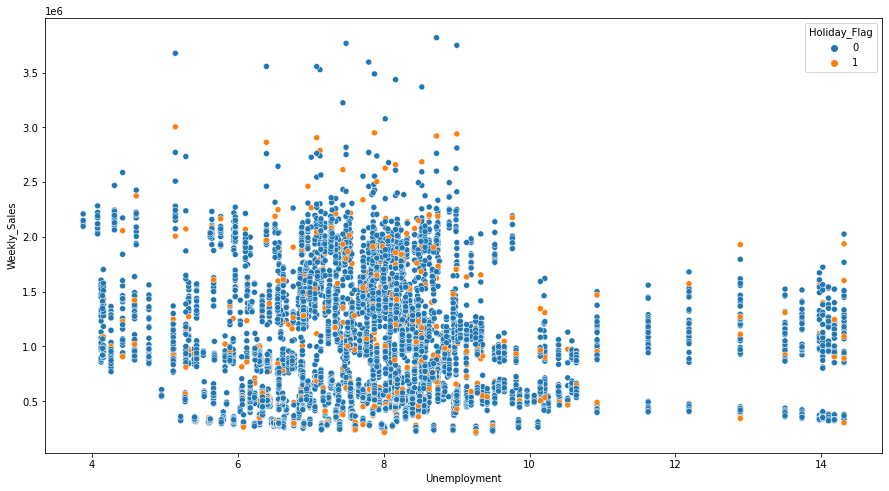

In [10]:
#Observando um gráfico scatter comparando vendas semanais com taxa de desemprego e holiday flag.
#É possível observar alguns outliers no gráfico.
#Também é possível observar baixa correlação entre as variáveis. 
plt.figure(figsize = (15,8))
sns.scatterplot(data=df, y="Weekly_Sales", x="Unemployment", hue='Holiday_Flag')


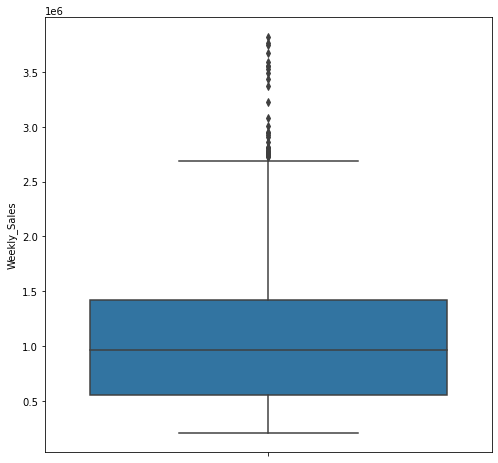

In [11]:
#O boxplot corrobora para identificar os outliers Weekly Sales
plt.figure(figsize = (8,8))
ax = sns.boxplot(y=df['Weekly_Sales'])

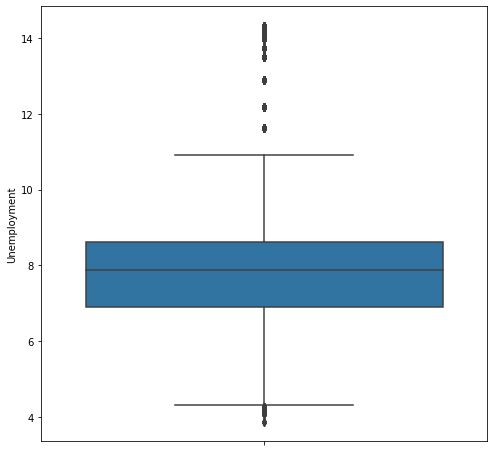

In [12]:
#O boxplot corrobora para identificar os outliers Unemployment
plt.figure(figsize = (8,8))
ax = sns.boxplot(y=df['Unemployment'])

In [13]:
#Filtrando as 20 melhores semanas do período estudado, não observamos um padrão de Holiday_Flag, corroborando para a análise de correlação.

df.sort_values('Weekly_Sales',ascending=False).head(20)

#É possível observar uma forte concentração nas semanas de Christmas e Thanksgiving

#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

#O fato de não ter vindo junto à base de dados as semanas com 23/12 e 24/12 como Christmas, trouxe uma falsa impressão que os feriados não tinham influência
#no volume de vendas. Porém ao observarmos as melhores semanas, é possível notar que a maioria delas foram em período de feriados.


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795
1814,13,23-12-2011,3556766.03,0,24.76,3.186,129.984548,6.392
2815,20,23-12-2011,3555371.03,0,40.19,3.389,212.236040,7.082
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127
1385,10,23-12-2011,3487986.89,0,48.36,3.541,129.984548,7.874
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163


In [14]:
#Verificando quais foram as 20 semanas agrupadas que mais faturaram (em MM USD)

#Se agruparmos as vendas por data, ainda observamos uma concentração das semanas que mais venderam em dias de feriados.

df_sales_date = df.groupby('Date').sum().sort_values('Weekly_Sales', ascending=False)/1000000
df_sales_date['Weekly_Sales'].head(20)

Date
24-12-2010    80.931416
23-12-2011    76.998241
25-11-2011    66.593605
26-11-2010    65.821003
17-12-2010    61.820800
16-12-2011    60.085696
10-12-2010    55.666770
09-12-2011    55.561148
06-04-2012    53.502316
06-07-2012    51.253022
02-04-2010    50.423831
17-02-2012    50.197057
04-06-2010    50.188543
10-02-2012    50.009408
03-12-2010    49.909028
05-02-2010    49.750740
08-06-2012    49.651172
02-12-2011    49.390556
02-07-2010    48.917485
03-06-2011    48.771994
Name: Weekly_Sales, dtype: float64

In [15]:
#Identificando os outliers 'Weekly_Sales' com o método z-score
#O Z-score nos dá uma ideia do quanto um determinado ponto está afastado da média dos dados. Mede quantos desvio padrão abaixo ou acima da média populacional
#ou amostral os dados estão
#O corte de desvio padrão será de 2 desvios padrões, trazendo os resultados para dentro de 98% da distribuição normal.

list_weekly_sales = df['Weekly_Sales'].to_list()

outliers_weekly_sales = []

def find_outliers(list_weekly_sales):
    
    corte_dp = 2
    media = np.mean(list_weekly_sales)
    dp = np.std(list_weekly_sales)

    for dado in list_weekly_sales:

        z_score = (dado - media)/dp
        if np.abs(z_score) >= corte_dp:
            outliers_weekly_sales.append(dado)

    return outliers_weekly_sales

In [16]:
#Vamos armazenar as semanas que foram outliers, separando em uma lista.
#Na parte de limpeza e tratamento de dados, iremos excluir elas da nossa amostra a fim de suavizar nossa amostra.

outliers = find_outliers(list_weekly_sales)
print(outliers)
print(f'Tamanho da lista de outliers = {len(outliers)}')

[2387950.2, 2270188.99, 2658725.29, 2378726.55, 2609166.75, 3436007.68, 2614202.3, 2290549.32, 2432736.52, 3224369.8, 2196688.46, 2188307.39, 2789469.45, 2302504.86, 2740057.14, 3526713.39, 2187847.29, 2316495.56, 2220600.76, 2232892.1, 2207742.13, 2281217.31, 2203028.96, 2243946.59, 3004702.33, 2180999.26, 2508955.24, 2771397.17, 3676388.98, 2374660.64, 2427640.17, 2226662.17, 2206319.9, 2202450.81, 2214967.44, 2470206.13, 2196968.33, 2207214.81, 2179360.94, 2245257.18, 2234190.93, 2197299.65, 2224499.28, 2193367.69, 2283540.3, 2209835.43, 2267452.4, 2727575.18, 2249811.55, 2644633.02, 2193048.75, 2176028.52, 2939946.38, 2251206.64, 2411790.21, 2811646.85, 3749057.69, 2950198.64, 2429310.9, 2555031.18, 3487986.89, 2218595.8, 2306265.36, 2213518.5, 2766400.05, 2461468.35, 2771646.81, 3595903.2, 2864170.61, 2462779.06, 2760346.71, 3556766.03, 2214477.06, 2271614.76, 2182437.9, 2184980.35, 2623469.95, 2204556.7, 2237544.75, 2495630.51, 2258781.28, 2370116.52, 2227152.16, 2363601.47, 2249

In [17]:
#Identificando os outliers 'Unemployment' com o método z-score
#O Z-score nos dá uma ideia do quanto um determinado ponto está afastado da média dos dados. Mede quantos desvio padrão abaixo ou acima da média populacional
#ou amostral os dados estão


list_unemployment = df['Unemployment'].to_list()

outliers_unemployment = []

def find_outliers(list_unemployment):
    
    corte_dp = 2
    media = np.mean(list_unemployment)
    dp = np.std(list_unemployment)

    for dado in list_unemployment:

        z_score = (dado - media)/dp
        if np.abs(z_score) >= corte_dp:
            outliers_unemployment.append(dado)

    return outliers_unemployment

In [18]:
#Vamos armazenar as semanas com desemprego que foram outliers, separando em uma lista.
#Na parte de limpeza e tratamento de dados, iremos excluir elas da nossa amostra a fim de suavizar nossa amostra.

outliers_unemployment = find_outliers(list_unemployment)
print(outliers_unemployment)
print(f'Tamanho da lista de outliers = {len(outliers_unemployment)}')

[4.077, 4.077, 4.077, 4.077, 4.077, 4.077, 4.077, 4.077, 4.077, 4.077, 4.077, 4.077, 4.077, 3.879, 3.879, 3.879, 3.879, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 13.975, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.099, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.18, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.313, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 14.021, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.736, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 13.503, 12.89, 12.89, 12.89, 12.89, 12.89, 12.89, 12.89, 12.89, 12.89, 12.89, 12.89, 12.89, 12.89, 12.187, 12.187, 12.187, 12.187, 12.187, 12.187, 12.187, 12.187, 12.187, 12.187, 12.187, 12.187, 12.187, 4.

In [19]:
#Verificando a somatória de vendas por loja (em MM USD), ordenado pelas lojas que mais venderam durante o período

df_sales_store = df.groupby('Store').sum().sort_values('Weekly_Sales', ascending=False)/1000000
df_sales_store

#A loja que mais vendeu durante o período analisado foi a loja 20

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,301.397792,0.00001,0.007930,0.000489,0.029892,0.001054
4,299.543953,0.00001,0.008902,0.000460,0.018401,0.000853
14,288.999911,0.00001,0.008264,0.000489,0.026639,0.001237
13,286.517704,0.00001,0.007679,0.000470,0.018401,0.001001
2,275.382441,0.00001,0.009755,0.000460,0.030837,0.001090
10,271.617714,0.00001,0.010330,0.000511,0.018401,0.001196
27,253.855917,0.00001,0.008195,0.000512,0.019879,0.001144
6,223.756131,0.00001,0.009967,0.000460,0.031110,0.000945
1,222.402809,0.00001,0.009768,0.000460,0.030888,0.001088


In [20]:
#Observando o comportamento da loja 20, é possível afirmar que ela sempre (todas as semanas) faturou mais do que a média de faturamento das lojas

#É possível afirmar isso pois a quantidade de semanas manteve-se inalterada quando filtramos para o df nos mostrar apenas as Semanas que faturaram acima
#da média geral
df.loc[(df['Store']==20) & (df['Weekly_Sales'] > 1046964.8775617732)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,05-02-2010,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,12-02-2010,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,19-02-2010,2161549.76,0,25.43,2.745,204.432100,8.187
2720,20,26-02-2010,1898193.95,0,32.32,2.754,204.463087,8.187
2721,20,05-03-2010,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...,...
2855,20,28-09-2012,2008350.58,0,58.65,3.997,215.736716,7.280
2856,20,05-10-2012,2246411.89,0,60.77,3.985,215.925886,7.293
2857,20,12-10-2012,2162951.36,0,47.20,4.000,216.115057,7.293
2858,20,19-10-2012,1999363.49,0,56.26,3.969,216.146470,7.293


In [21]:
#Média de vendas geral
df['Weekly_Sales'].mean()

1046964.8775617732

Limpeza e Tratamento dos dados

In [22]:
#Criando um df para manipular dados
df2 = df.copy()

In [23]:
#Transformando o formato 'df[Date]' em datetime
df2['Date'] = pd.to_datetime(df2['Date'], format = '%d-%m-%Y')
df2['Date'].head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

In [24]:
#Descobrindo a média e a sazonalidade das vendas mensalmente (em MM), antes da suavização retirando os outliers
df_sales_month_mean = df2.groupby(df2.Date.dt.month)['Weekly_Sales'].mean()/1000000
df_sales_month_mean.sort_values(ascending=False)
#Meses que mais faturam são dezembro e novembro, com vendas de USD 1,28MM e USD 1,14MM respectivamente

Date
12    1.281864
11    1.147266
6     1.064325
2     1.053200
8     1.048017
7     1.031748
5     1.031714
4     1.026762
3     1.013309
10    0.999632
9     0.989335
1     0.923885
Name: Weekly_Sales, dtype: float64

In [25]:
#Possível observar a sazonalidade de vendas, tendo dezembro e novembro como melhores meses e janeiro como pior mês.
#Importante frizar informação foi levantada antes de tratamento de outliers.

#Média de faturamento dos meses
print(f'Média de faturamento dos meses: {df_sales_month_mean.mean():.2f}MM')

print(f'Dezembro fatura em média +{((df_sales_month_mean[12]/df_sales_month_mean.mean())-1)*100:.2f}% a mais do que a média mensal de faturamento, sendo o melhor mês.')

print(f'Novembro fatura em média +{((df_sales_month_mean[11]/df_sales_month_mean.mean())-1)*100:.2f}% a mais do que a média mensal de faturamento, sendo o segundo melhor mês.')

print(f'Janeiro fatura em média {((df_sales_month_mean[1]/df_sales_month_mean.mean())-1)*100:.2f}% a menos do que a média mensal de faturamento, sendo o pior mês.')

Média de faturamento dos meses: 1.05MM
Dezembro fatura em média +21.98% a mais do que a média mensal de faturamento, sendo o melhor mês.
Novembro fatura em média +9.17% a mais do que a média mensal de faturamento, sendo o segundo melhor mês.
Janeiro fatura em média -12.09% a menos do que a média mensal de faturamento, sendo o pior mês.


In [26]:
#Excluindo as vendas semanais que foram outliers, com a intenção de suavizar os dados

for i in outliers_weekly_sales:
    df2.drop(df2.loc[df['Weekly_Sales']==i].index, inplace=True)
    
#A quantidade de linhas deletadas = 31 (6435-152 = 6283) 
len(df2)

6283

In [27]:
#Verificando se as linhas deletadas não estão mais no df2
for i in outliers_weekly_sales:
    print(df2.loc[df['Weekly_Sales']==i])

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Empty DataFrame
Columns: [Store,

In [28]:
#Excluindo as vendas com unemployment que foram outliers, com a intenção de suavizar os dados

for i in outliers_unemployment:
    df2.drop(df2.loc[df['Unemployment']==i].index, inplace=True)
    
#A quantidade de linhas deletadas = 416 (6283-416 = 5871) 
len(df2)

5871

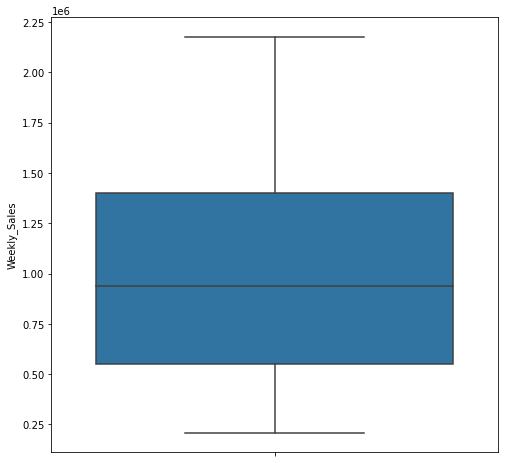

In [29]:
#Visualizando o boxplot das variáveis excluídas
plt.figure(figsize = (8,8))
ax = sns.boxplot(y=df2['Weekly_Sales'])

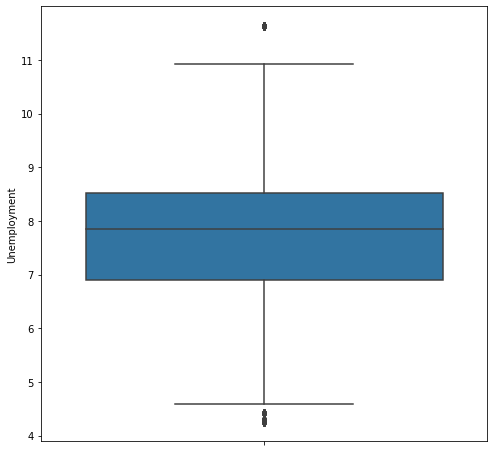

In [30]:
#Visualizando o boxplot das variáveis excluídas
plt.figure(figsize = (8,8))
ax = sns.boxplot(y=df2['Unemployment'])

In [31]:
#Em um universo de 45 lojas, vamos analisar o primeiro quartil de Weekly Sales, ou seja, as 12 lojas que mais faturaram
df_sales_store.head(12).index

Int64Index([20, 4, 14, 13, 2, 10, 27, 6, 1, 39, 19, 31], dtype='int64', name='Store')

In [32]:
#Verificando a somatória de vendas por loja SUAVIZADAS (com os outliers eliminados) (em MM USD), ordenado pelas lojas que mais venderam durante o 
#período 

df2_sales_store = df2.groupby('Store').sum().sort_values('Weekly_Sales', ascending=False)/1000000
df2_sales_store

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
13,254.424713,0.000008,0.007194,0.000431,0.016851,0.000921
2,251.541268,0.000008,0.009310,0.000433,0.028898,0.001021
10,239.443865,0.000006,0.009685,0.000472,0.016864,0.001092
27,238.350405,0.000008,0.007956,0.000491,0.019047,0.001096
20,226.942383,0.000006,0.006579,0.000387,0.023622,0.000835
1,217.744670,0.000010,0.009668,0.000454,0.030457,0.001073
14,217.719191,0.000006,0.006629,0.000399,0.021306,0.000983
6,213.866658,0.000008,0.009734,0.000448,0.030243,0.000918
19,201.476496,0.000010,0.007416,0.000505,0.019049,0.001128


In [33]:
#Obtendo a evolução das vendas semanais das 12 lojas que mais faturaram (com outliers excluídos)
#Notamos que a maioria das lojas que mais faturaram tiveram evolução negativa.
#Único destaque positivo foi a loja 39 (a 10ª loja que mais faturou durante o período)

for i in df2_sales_store.head(12).index:
    df_i = df2.loc[df2['Store']==i]
    print(f'Evolução Vendas Semanais | Loja {i} = {((df_i["Weekly_Sales"].iloc[-1]  / df_i["Weekly_Sales"].iloc[0])-1)*100:.2f}%')

Evolução Vendas Semanais | Loja 13 = 3.46%
Evolução Vendas Semanais | Loja 2 = -14.16%
Evolução Vendas Semanais | Loja 10 = -17.46%
Evolução Vendas Semanais | Loja 27 = -9.14%
Evolução Vendas Semanais | Loja 20 = -3.67%
Evolução Vendas Semanais | Loja 1 = -9.13%
Evolução Vendas Semanais | Loja 14 = 0.01%
Evolução Vendas Semanais | Loja 6 = -13.39%
Evolução Vendas Semanais | Loja 19 = -12.31%
Evolução Vendas Semanais | Loja 39 = 27.54%
Evolução Vendas Semanais | Loja 31 = -8.78%
Evolução Vendas Semanais | Loja 24 = -5.87%


In [34]:
#Fazendo prova real do cálculo manualmente
df_i = df2.loc[df2['Store']==13]
df_i #((2035189.66 / 1967220.53) - 1) *100 = +3,45%

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1716,13,2010-02-05,1967220.53,0,31.53,2.666,126.442065,8.316
1717,13,2010-02-12,2030933.46,1,33.16,2.671,126.496258,8.316
1718,13,2010-02-19,1970274.64,0,35.70,2.654,126.526286,8.316
1719,13,2010-02-26,1817850.32,0,29.98,2.667,126.552286,8.316
1720,13,2010-03-05,1939980.43,0,40.65,2.681,126.578286,8.316
...,...,...,...,...,...,...,...,...
1854,13,2012-09-28,1927664.11,0,64.80,3.821,131.043000,5.765
1855,13,2012-10-05,2041918.74,0,61.79,3.815,131.075667,5.621
1856,13,2012-10-12,1999079.44,0,55.10,3.797,131.108333,5.621
1857,13,2012-10-19,2018010.15,0,52.06,3.781,131.149968,5.621


In [35]:
#Foi interessante notar que aparentemente as lojas que mais venderam durante o período, não obtiveram crescimento significativo de vendas.

#Para entender esse fenômeno, vamos olhar o crescimento de vendas gerais do Wall Mart durante o período

#Gerando um dataframe com os valores de vendas agrupados por semana
df2_groupby_date = df2.groupby('Date').sum()
df2_groupby_date.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,913,39401931.53,0,1275.70,104.887,6656.003181,319.000
2010-02-12,943,40953295.00,40,1314.40,106.992,6919.671064,327.556
2010-02-19,943,43158477.09,0,1501.63,108.753,6992.612236,336.952
2010-02-26,957,41043557.90,0,1615.27,112.302,7176.277702,345.944
2010-03-05,943,41576231.94,0,1732.84,111.166,6995.788231,336.952


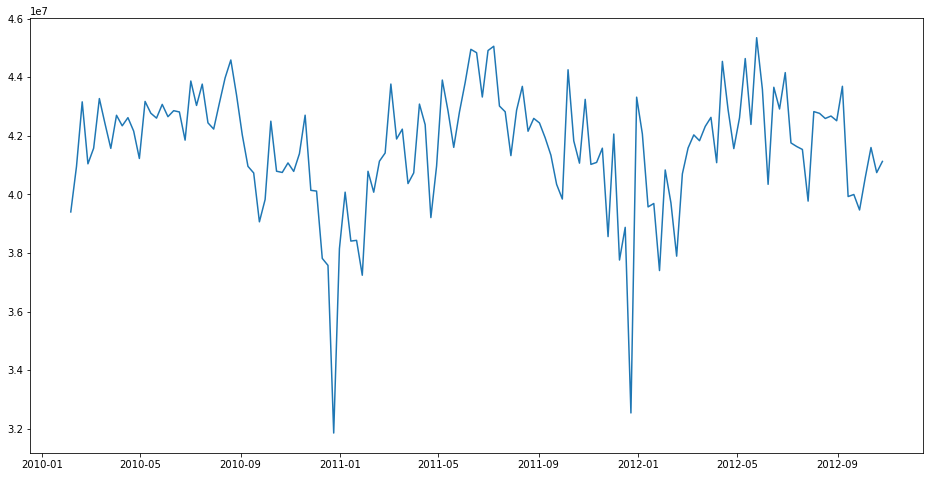

In [36]:
x = df2_groupby_date.index
y = df2_groupby_date['Weekly_Sales']
plt.figure(figsize = (16,8))
plt.plot(x,y)
plt.show()

#Nossa desconfiança sobre o crescimento da receita das lojas foi confirmada ao visualizar o gráfico da evolução de vendas totais.

#É possível observar que a receita manteve-se praticamente estável durante o período, os destaques negativos ocorreram por conta da exclusão de dados outliers
#de venda, que provavelmente ocorreram concentrados nos meses de novembro e dezembro.

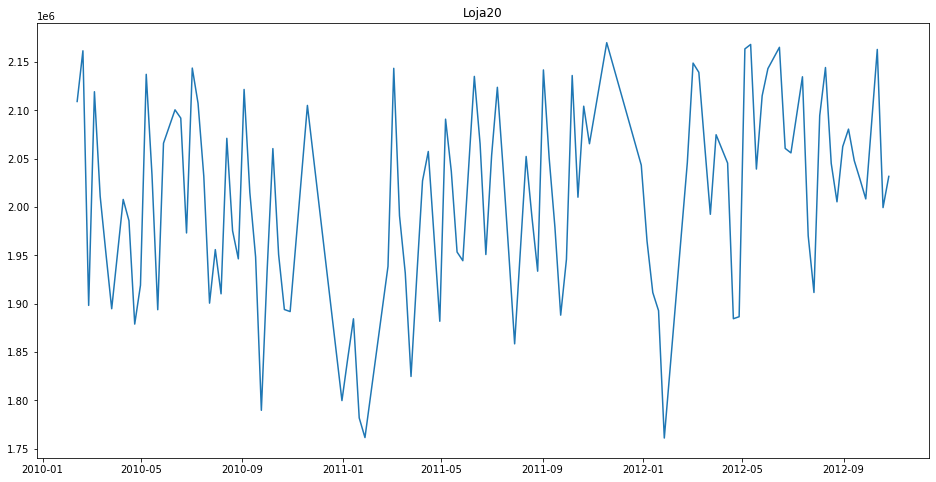

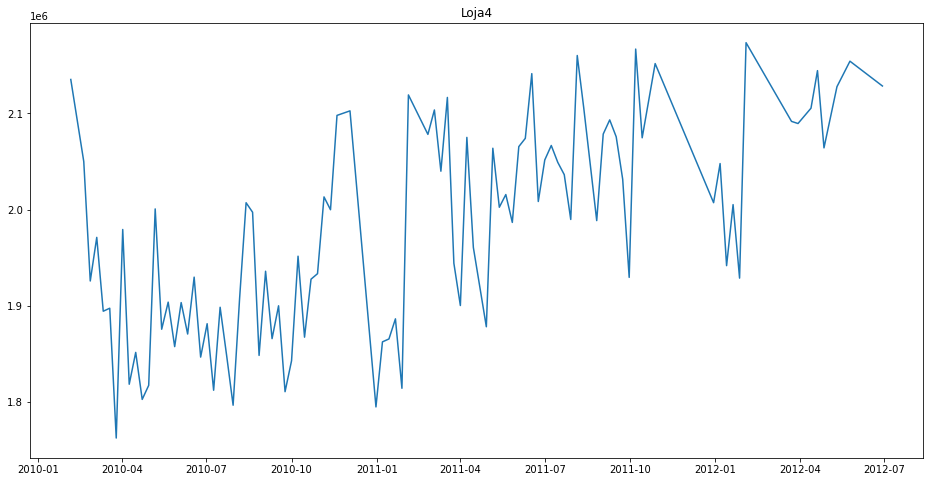

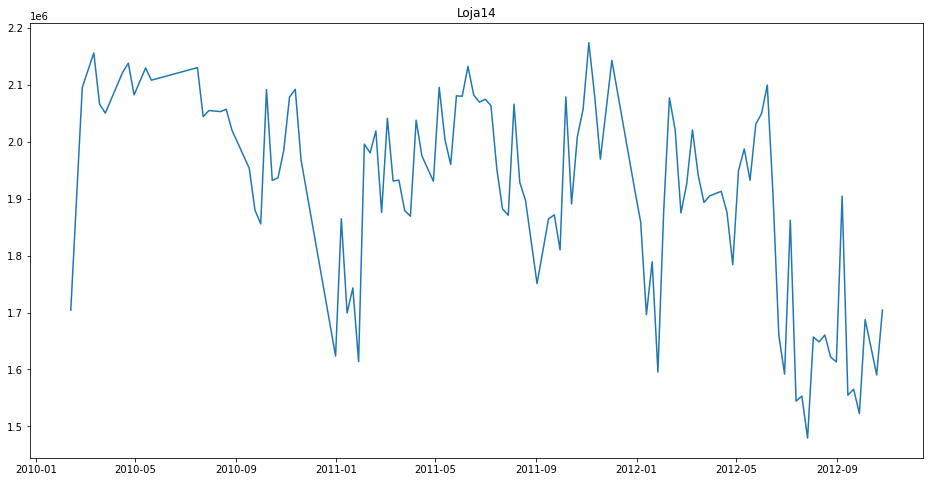

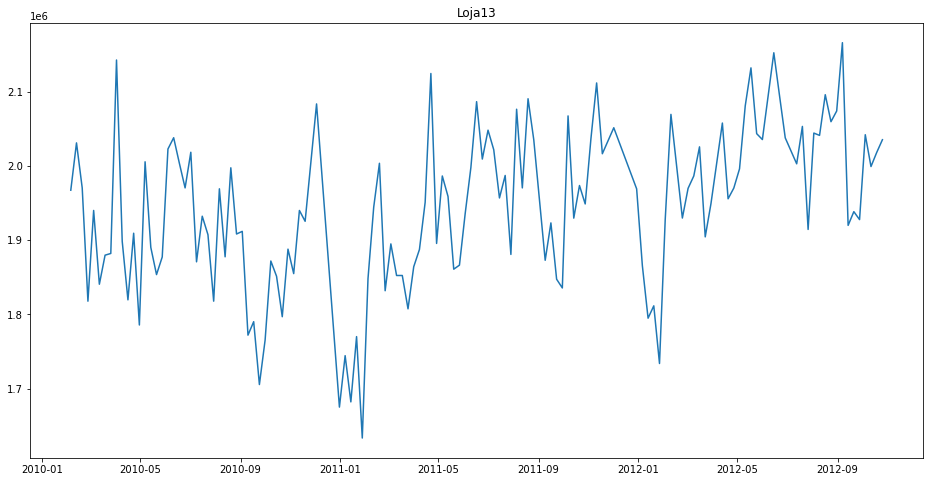

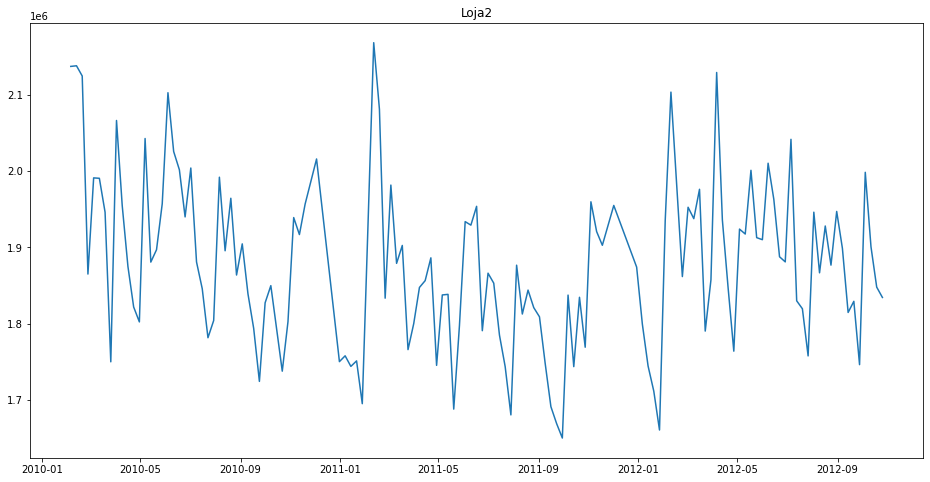

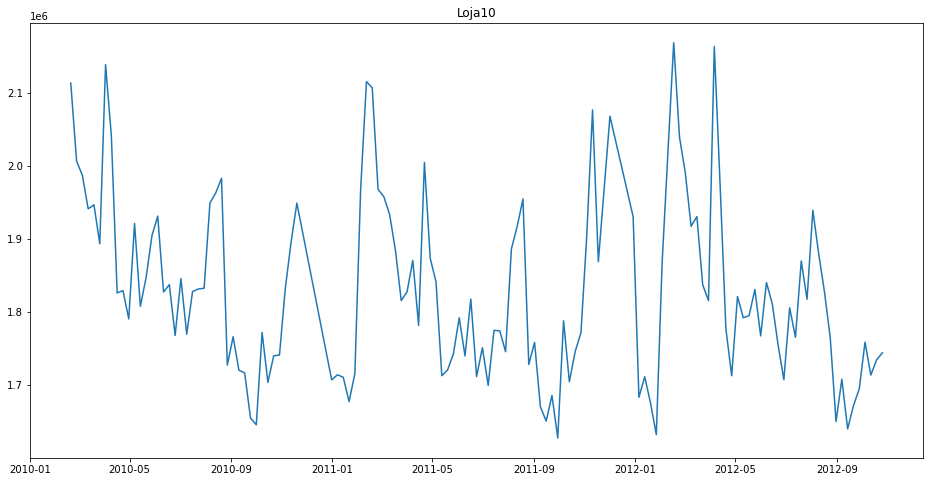

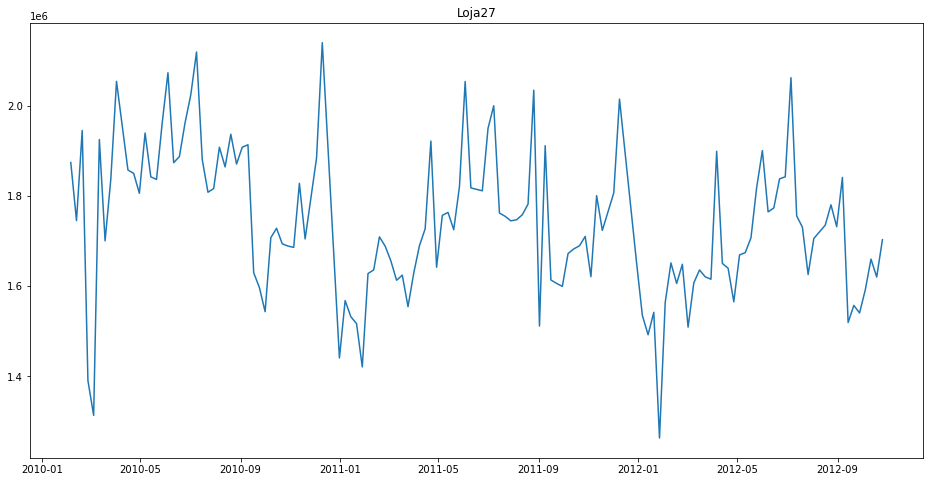

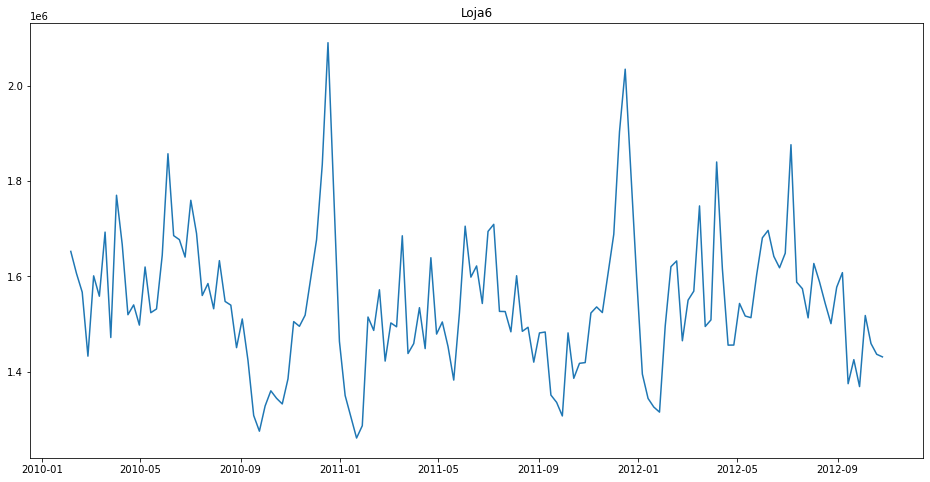

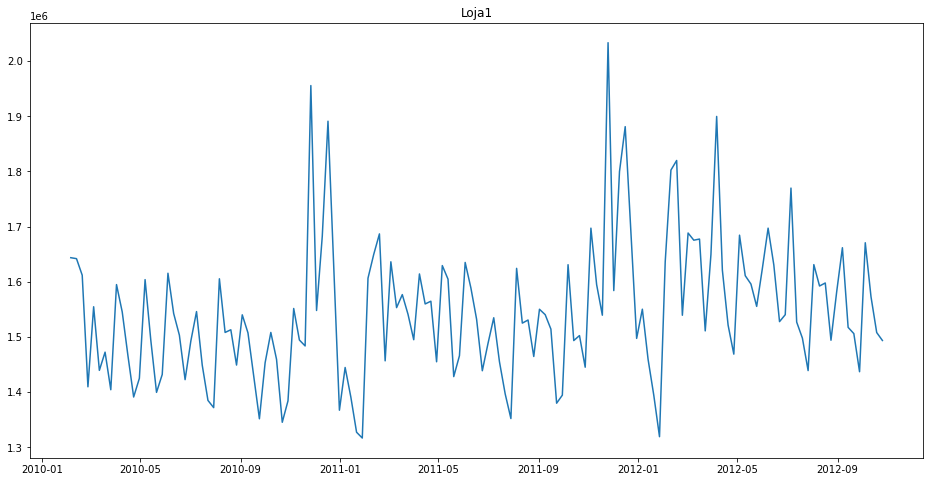

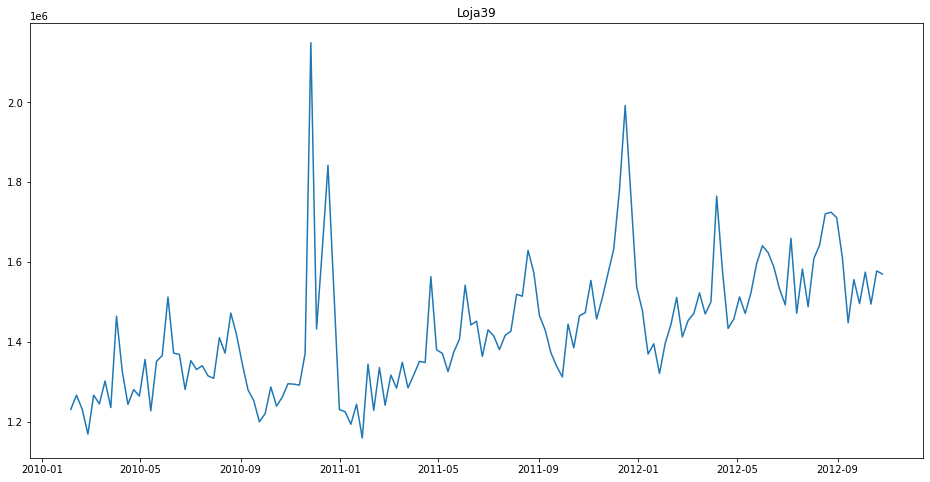

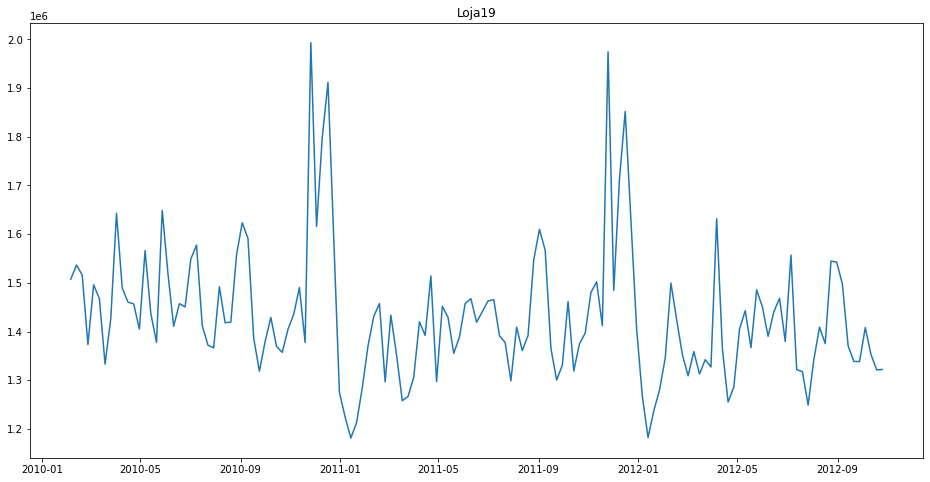

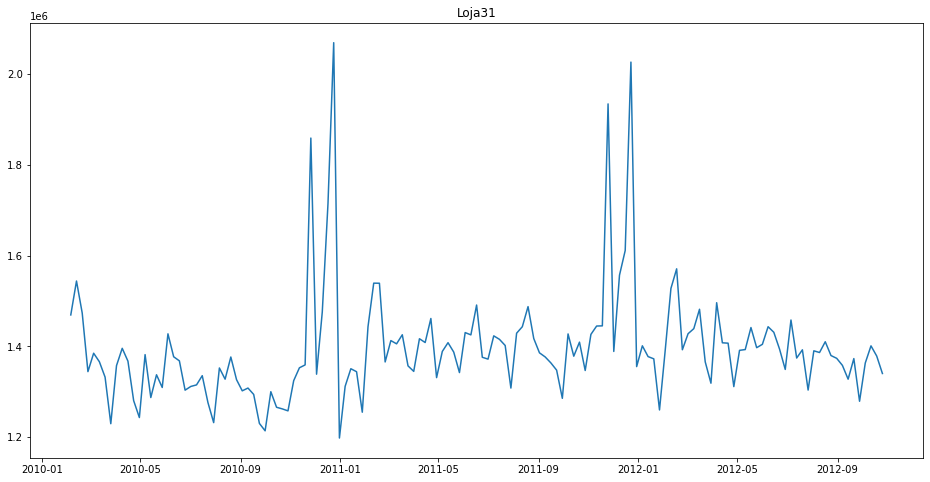

In [37]:
#Vamos plotar os gráficos da evolução das vendas (suavizados) das 12 lojas que mais faturaram durante o período

for i in df_sales_store.head(12).index:    
    x = df2.loc[df2['Store']==i]['Date']
    y = df2.loc[df2['Store']==i]['Weekly_Sales']
    plt.figure(figsize = (16,8))
    plt. title(f"Loja{i}", loc = 'center')
    plt.plot(x,y)
    plt.show()

#Observamos que a loja que 39 obteve um crescimento quase que linear durante o período, obtendo alguns picos de receita nos meses de novembro e dezembro.

In [38]:
#Conclui-se que a única loja que apresentou evolução de vendas durante o período, coincidentemente apresentou uma tendência de alta na evolução das vendas

#Essa loja foi a 39

#Portanto é a que é mais interessante para investimento de ampliação.

#Importante observar que a loja 4 obteve um pico de vendas no início da série temporal, depois teve uma brusca queda nas vendas. Em seguida vem recuperando
#em uma tendência de alta nas vendas

#Vale a pena investigar esse caso sem tratamento de outliers, para vermos a real evolução de vendas.


In [39]:
#Gerando um dataframe com os valores de vendas (sem tratamento) agrupados por semana
df_groupby_date = df.groupby('Date').sum()
df_groupby_date.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
01-04-2011,1035,43458991.19,0,2193.14,162.106,7682.643804,366.756
01-06-2012,1035,48281649.72,0,3282.47,168.787,7902.143467,333.879
01-07-2011,1035,47578519.50,0,3544.16,165.419,7712.812232,364.387
01-10-2010,1035,42239875.87,0,3144.06,123.045,7575.961790,381.388
02-03-2012,1035,46861034.97,0,2046.89,166.321,7871.451175,337.875


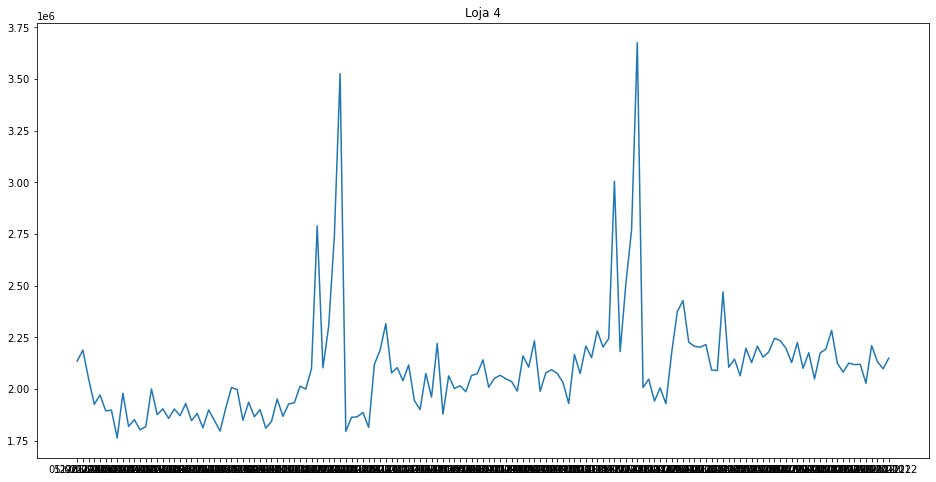

In [40]:
x = df.loc[df['Store']==4]['Date']
y = df.loc[df['Store']==4]['Weekly_Sales']
plt.figure(figsize = (16,8))
plt. title(f"Loja 4", loc = 'center')
plt.plot(x,y)
plt.show()

In [41]:
#Quando olhamos o comportamento da loja 4, sem tratar outliers, a impressão que é de uma pequena melhora nas vendas.

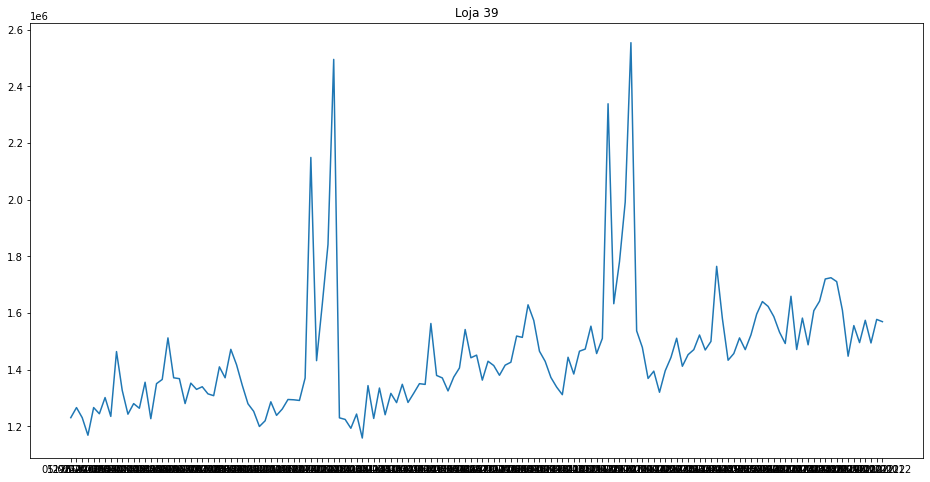

In [42]:
x = df.loc[df['Store']==39]['Date']
y = df.loc[df['Store']==39]['Weekly_Sales']
plt.figure(figsize = (16,8))
plt. title(f"Loja 39", loc = 'center')
plt.plot(x,y)
plt.show()

In [43]:
#Quando comparamos com o gráfico 39, fica nítida a diferença, priorizando a loja 39 frente à loja 4, pois a 39 mantem tendência de alta das vendas
#durante todo o período